<a href="https://colab.research.google.com/github/baqir-n/Melbourne-File/blob/main/Melbourne_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import files
%matplotlib inline

# **Data Visualization and Analysis**

In [ ]:
upload = files.upload()

Saving melb_data.csv to melb_data.csv


In [ ]:
melb_data = pd.read_csv('melb_data.csv')

In [ ]:
home_data = melb_data.copy()
home_data.shape

(13580, 21)

In [ ]:
home_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
home_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
home_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


> Since we notice NA entries in the data as well. We need to find columns with NA entries by percentage.


In [ ]:
home_data.isna().sum()*100/len(home_data)

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

In [ ]:
col_missing_values = [col for col in home_data.columns if home_data[col].isna().any()]
print(col_missing_values)

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']



> Checking out skew of the columns with missing values to figure out a suitable imputer

Skew BuildingArea:  77.69154091544215


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


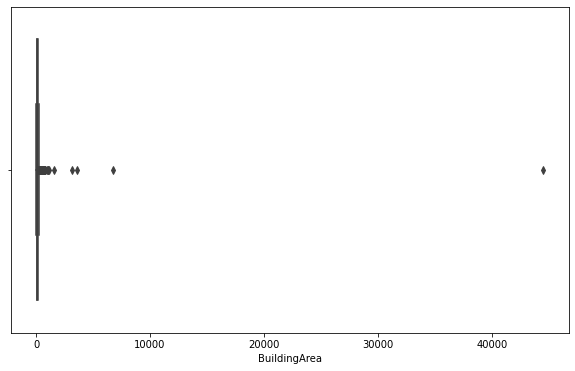

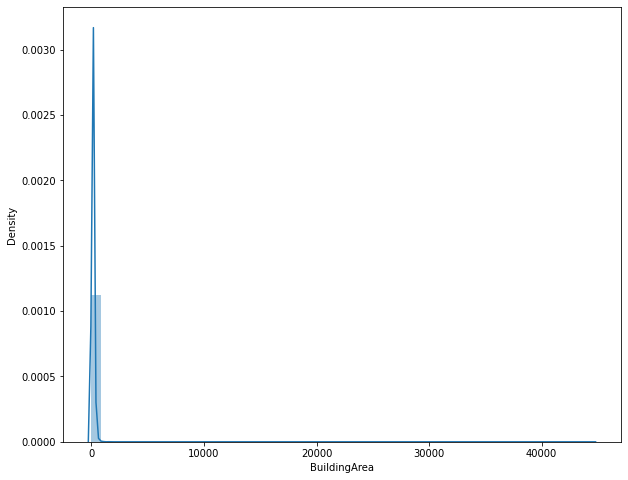

In [ ]:
print('Skew BuildingArea: ',home_data['BuildingArea'].skew())
fig, ax= plt.subplots(figsize=(10, 6))
sns.boxplot(home_data.BuildingArea)
fig, ax= plt.subplots(figsize=(10, 8))
sns.distplot(home_data['BuildingArea'])

Skew Car:  1.3696759255976967


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


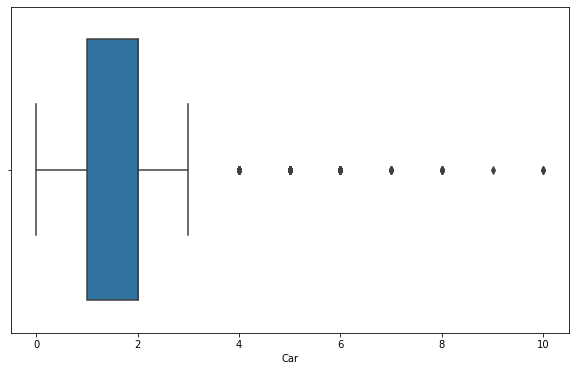

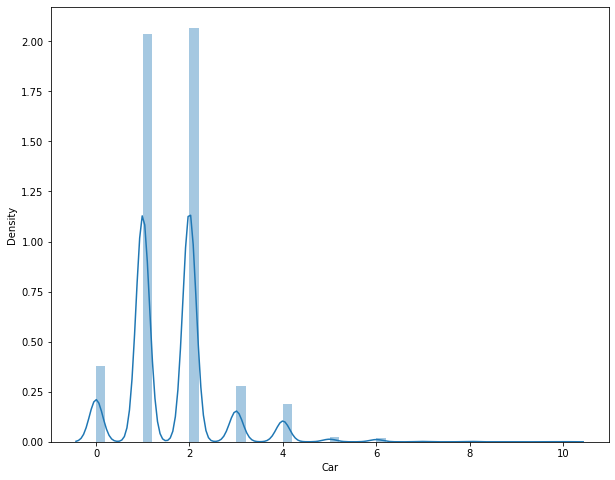

In [ ]:
print('Skew Car: ',home_data['Car'].skew())
fig, ax= plt.subplots(figsize=(10, 6))
sns.boxplot(home_data['Car'])
fig, ax= plt.subplots(figsize=(10, 8))
sns.distplot(home_data['Car'])

Skew YearBuilt:  -1.5412787597590965


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


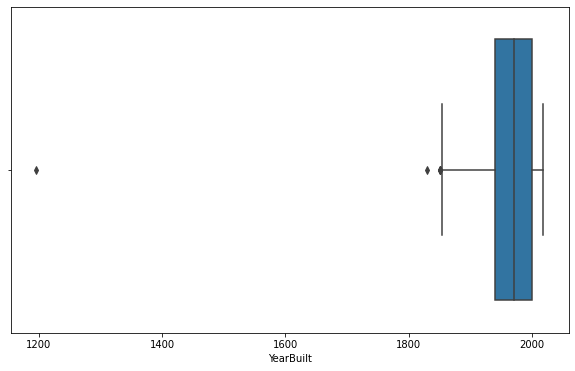

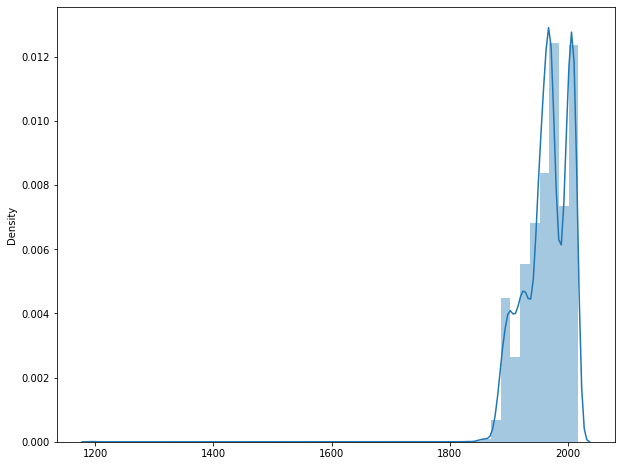

In [ ]:
print('Skew YearBuilt: ',home_data['YearBuilt'].skew())
fig, ax= plt.subplots(figsize=(10, 6))
sns.boxplot(x=home_data['YearBuilt'])
fig, ax= plt.subplots(figsize=(10, 8))
sns.distplot(x=home_data['YearBuilt'])

In [ ]:
numerical_columns = [col for col in home_data.columns if home_data[col].dtype in ['int64', 'float64']]
catagorical_columns = [col for col in home_data.columns if home_data[col].dtype == 'object']
print(catagorical_columns)                     


['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


> We need to identify the unique entries in each object columns

In [ ]:
home_data[catagorical_columns].nunique()

Suburb           314
Address        13378
Type               3
Method             5
SellerG          268
Date              58
CouncilArea       33
Regionname         8
dtype: int64

# *Building Pipeline*


*   Imputaion.
*   Encoding.
*   Column Transformation.   
*   Model implementation.








In [ ]:
X = home_data.copy()
X.drop(['Price'], axis=1, inplace=True)
y = home_data.Price

train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state=1)
print(train_X.shape, val_X.shape)

(10864, 20) (2716, 20)


In [ ]:
numerical_columns=[col for col in X.columns if X[col].dtype in ['int64', 'float64']]
catagorical_ordinal_col=[col for col in X.columns if X[col].dtype == 'object' and X[col].nunique()>10]
catagorical_OH_col=[col for col in X.columns if X[col].dtype == 'object' and X[col].nunique()<=10 and col != 'YearBuilt'] 

In [ ]:
For_num_cols = SimpleImputer(strategy='most_frequent', add_indicator=True)
For_ord_cat_cols = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-999))])
For_oh_cat_cols = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('encoder', OneHotEncoder(handle_unknown='ignore'))])
Preprocessor = ColumnTransformer(transformers=[('num', For_num_cols, numerical_columns), ('cat_oh', For_oh_cat_cols, catagorical_OH_col)])

In [ ]:
ran_model = RandomForestRegressor(n_estimators=40, random_state=1)

In [ ]:
First_Pipeline = Pipeline(steps=[('Preprocessor', Preprocessor), ('ran_model', ran_model)])

In [ ]:
First_Pipeline.fit(train_X, train_y)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='most_frequent'),
                                                  ['Rooms', 'Distance',
                                                   'Postcode', 'Bedroom2',
                                                   'Bathroom', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'YearBuilt', 'Lattitude',
                                                   'Longtitude',
                                                   'Propertycount']),
                                                 ('cat_oh',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy

In [ ]:
pipeline_pred = First_Pipeline.predict(val_X)
pipeline_MAE = mean_absolute_error(pipeline_pred, val_y)
print('Pipeline MAE:', pipeline_MAE)

Pipeline MAE: 158981.50448883162


> Our pipeline is working just fine we can take it in to cross validation sets



# *Cross Validation*

In [ ]:
def get_score(n_estimators):
    Second_Pipeline = Pipeline(steps=[('preprocessor', Preprocessor), ('model', RandomForestRegressor(n_estimators, random_state=0))]) 
    score = -1 * cross_val_score(Second_Pipeline, X,y, cv=5, scoring='neg_mean_absolute_error')
    mae= "MAE(n_estimator: "+str(n_estimators)+")"
    print(pd.DataFrame(score, columns=[mae]))
    return score.mean()

In [ ]:
scores = {n_estimators : get_score(n_estimators) for n_estimators in range(10, 160, 10)}

   MAE(n_estimator: 10)
0         220695.054210
1         198879.211770
2         194131.042820
3         163057.906775
4         174172.301915
   MAE(n_estimator: 20)
0         214144.024908
1         195497.609861
2         190490.950166
3         158077.297656
4         164473.223398
   MAE(n_estimator: 30)
0         211950.060702
1         195492.068193
2         188986.393041
3         155079.002925
4         160779.625773
   MAE(n_estimator: 40)
0         212101.798810
1         193772.009142
2         188440.830658
3         153492.653952
4         158740.380985
   MAE(n_estimator: 50)
0         211421.170434
1         192815.258111
2         188023.706109
3         153710.428017
4         157665.768634
   MAE(n_estimator: 60)
0         210146.699450
1         193356.586443
2         187475.098656
3         153757.844811
4         157351.331919
   MAE(n_estimator: 70)
0         209559.505900
1         192974.973649
2         187107.320568
3         154106.835820
4         157443

Min avg.MAE yielding estimators:  150 at MAE : 179585.96710580454
Max avg.MAE yielding estimators:  10 at MAE : 190187.10349779087


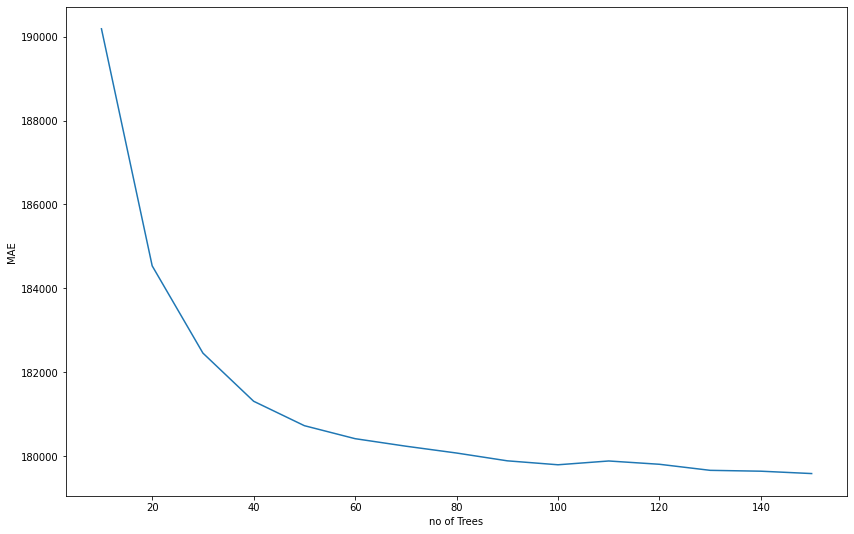

In [ ]:
print('Min avg.MAE yielding estimators: ', min(scores, key=scores.get), 'at MAE :', scores.get(min(scores, key=scores.get)))
print('Max avg.MAE yielding estimators: ', max(scores, key=scores.get), 'at MAE :', scores.get(max(scores, key=scores.get)))
plt.figure(figsize=(14,9))
plt.xlabel('no of Trees'), plt.ylabel('MAE')
plt.plot(list( scores.keys()), list(scores.values()) )
plt.show()

In [ ]:
optimum_MAE = min(list(scores.values()))
print(optimum_MAE)

179585.96710580454


# **Gradient Boosting**
*   improve model 
*   create indepth regressor
*   Update Pridictions






In [ ]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1)

In [ ]:
Third_Pipeline = Pipeline(steps=[('Preprocessor', Preprocessor), ('xgb_model', xgb_model)])

In [ ]:
Third_Pipeline.fit(train_X, train_y)

[15:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='most_frequent'),
                                                  ['Rooms', 'Distance',
                                                   'Postcode', 'Bedroom2',
                                                   'Bathroom', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'YearBuilt', 'Lattitude',
                                                   'Longtitude',
                                                   'Propertycount']),
                                                 ('cat_oh',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy

In [ ]:
xgb_pred = Third_Pipeline.predict(val_X)

In [ ]:
xgb_mae = mean_absolute_error(xgb_pred, val_y)
print(xgb_mae)

158620.1117423371


gradient booster is working fine we can take it further to find best learning rate

In [ ]:
def get_xgb(lr):
    Third_Pipeline = Pipeline(steps=[('preprocessor', Preprocessor), ('xgb_model', XGBRegressor(objective ='reg:squarederror', n_estimators=1000,  learning_rate = lr , early_stopping_rounds=5, max_depth = 5, random_state=1))]) 
    xgb_score = -1 * cross_val_score(Third_Pipeline, X,y, cv=5, scoring='neg_mean_absolute_error')
    mae= "MAE(n_estimator at:" + str(lr) + ")"
    print(pd.DataFrame(xgb_score, columns=[mae]))
    return xgb_score.mean()

In [ ]:
scores_lrn = {learning_rate : get_xgb(learning_rate) for learning_rate in [0.02, 0.04, 0.06, 0.08, 0.1]}

   MAE(n_estimator at:0.02)
0             202265.000794
1             187354.753590
2             184115.202302
3             157288.890096
4             167977.368073
   MAE(n_estimator at:0.04)
0             201096.073626
1             183568.578827
2             184037.519991
3             155517.865595
4             168206.728139
   MAE(n_estimator at:0.06)
0             202237.333136
1             184968.757623
2             185013.123487
3             158027.862738
4             168361.334499
   MAE(n_estimator at:0.08)
0             205043.772963
1             185041.461867
2             186376.007516
3             157559.820308
4             167726.491595
   MAE(n_estimator at:0.1)
0            208989.560837
1            188958.417964
2            187033.889496
3            159265.402534
4            169384.782803


Min avg.MAE yielding learning_rate:  0.04 at MAE : 178485.35323574417
Max avg.MAE yielding learning_rate:  0.1 at MAE : 182726.4107270141


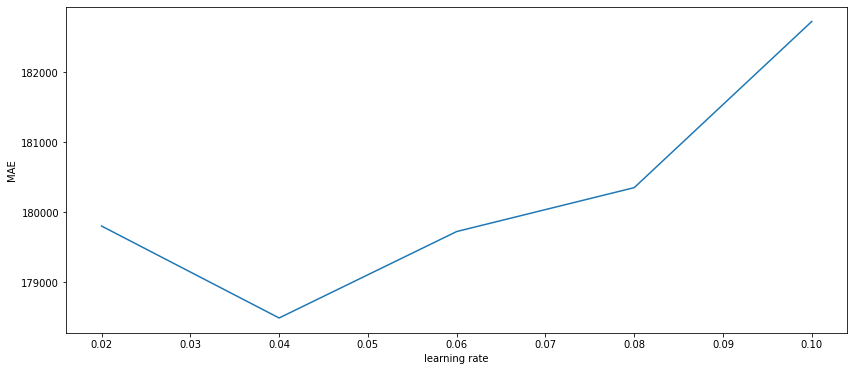

In [ ]:
print('Min avg.MAE yielding learning_rate: ', min(scores_lrn, key=scores_lrn.get), 'at MAE :', scores_lrn.get(min(scores_lrn, key=scores_lrn.get)))
print('Max avg.MAE yielding learning_rate: ', max(scores_lrn, key=scores_lrn.get), 'at MAE :', scores_lrn.get(max(scores_lrn, key=scores_lrn.get)))
plt.figure(figsize=(14,6))
plt.xlabel('learning rate'), plt.ylabel('MAE')
plt.plot(list( scores_lrn.keys()), list(scores_lrn.values()) )
plt.show()

In [ ]:
optimum_xgb_MAE = min(list(scores_lrn.values()))
print('optimum_xgb_MAE:' ,optimum_xgb_MAE)

optimum_xgb_MAE: 178485.35323574417




> We apply the best obtained learning rate  i.e. 0.04 to pipeline




In [ ]:
lr = 0.04
Third_Pipeline = Pipeline(steps=[('preprocessor', Preprocessor), ('xgb_model', XGBRegressor(objective ='reg:squarederror', n_estimators=1000,  learning_rate = lr , early_stopping_rounds=5, max_depth = 5, random_state=1))])

In [ ]:
X1 = [ 'Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date','Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea', 'Regionname', 'Propertycount']
X = X[X1]
Final_model = Third_Pipeline.fit(X,y)

# **Final Dataset Pridictions**

*   Evaluate Test Dataset
*   Visualize Dataset
*   Apply pipeline
*   Apply Model
*   Recieve Pridiction
*italicized text*

In [ ]:
upload = files.upload()

Saving final_file.csv to final_file.csv


In [ ]:
test_file = pd.read_csv('final_file.csv')
test_file.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Suburb', 'Address', 'Rooms', 'Type',
       'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [ ]:
test_file.describe()

,Unnamed: 0,Unnamed: 0.1,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6738.000000,6738.000000,6738.000000,6737.000000,6737.000000,3269.000000,3267.000000,3194.000000,1945.000000,1600.000000,1853.000000,3406.000000,3406.000000,6737.000000
mean,3368.500000,11020.243841,2.982042,11.521330,3115.326852,3.031814,1.596266,1.730432,1144.298201,200.161796,1972.890988,-37.810606,145.008742,7646.996438
std,1945.237389,5202.571380,0.950990,6.693933,111.646734,0.939200,0.670997,0.918355,14160.152858,1570.453824,33.397194,0.096022,0.134622,4689.033353
min,0.000000,8.000000,1.000000,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1860.000000,-38.178290,144.540220,389.000000
25%,1684.250000,7230.750000,2.000000,6.800000,3046.000000,2.000000,1.000000,1.000000,284.000000,98.000000,1960.000000,-37.867542,144.938090,4181.000000
50%,3368.500000,11810.500000,3.000000,10.900000,3101.000000,3.000000,2.000000,2.000000,556.000000,130.000000,1975.000000,-37.807045,145.013940,6567.000000
75%,5052.750000,15726.750000,4.000000,14.200000,3156.000000,4.000000,2.000000,2.000000,689.000000,176.250000,2000.000000,-37.745475,145.086020,10412.000000
max,6737.000000,18395.000000,12.000000,48.100000,3978.000000,9.000000,6.000000,8.000000,433014.000000,44515.000000,2017.000000,-37.453100,145.511370,21650.000000


In [ ]:
test_file.head()

,Unnamed: 0,Unnamed: 0.1,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,8,Abbotsford,217 Langridge St,3,h,S,Jellis,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
1,1,9,Abbotsford,18a Mollison St,2,t,S,Jellis,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
2,2,12,Abbotsford,403/609 Victoria St,2,u,S,Dingle,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
3,3,13,Abbotsford,25/84 Trenerry Cr,2,u,SP,Biggin,10/12/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
4,4,14,Abbotsford,106/119 Turner St,1,u,SP,Purplebricks,10/12/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0


In [ ]:
home_data_columns = home_data.columns.tolist()
test_file_columns = test_file.columns.tolist()
if home_data_columns == test_file_columns:
    print('test_file is ready to take further')
else:
  difference = set(home_data_columns).symmetric_difference(set(test_file_columns))
  columns_difference = list(difference)
  print('ummatched columns: ',columns_difference)  

ummatched columns:  ['Unnamed: 0', 'Unnamed: 0.1', 'Price']


The final file for predictions has the same features as the model and pipeline creation file. The price column doesn't exist because it needs to be figured out.

In [ ]:
final_data = test_file.drop(axis=1, columns=['Unnamed: 0', 'Unnamed: 0.1'])
final_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:

final_data.isnull().sum()*100/len(test_file)

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.014841
Postcode          0.014841
Bedroom2         51.484120
Bathroom         51.513802
Car              52.597210
Landsize         71.133868
BuildingArea     76.254081
YearBuilt        72.499258
CouncilArea      78.777085
Lattitude        49.450876
Longtitude       49.450876
Regionname        0.014841
Propertycount     0.014841
dtype: float64

Some features are missing more than 70% of data making these features completly useless. Although features like BuildingArea and Landsize are important features can make alot difference. 

In [ ]:
col_staying = ['BuildingArea', 'Landsize']
col_leaving = set(final_data.columns.tolist()) - set(col_staying)
col_droping = [col for col in final_data.columns if final_data[col].isnull().sum()*100/len(test_file)>=70 and col in col_leaving]
col_droping

['YearBuilt', 'CouncilArea']

Lattitude and Longtitude are uniqye for every house and can never be imputed via repeating values like mean, median, mode so droping them as well.

In [ ]:
col_droping.extend(['Lattitude', 'Longtitude'])
col_droping

['YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude']

In [ ]:
final_data_droped = final_data.drop(axis=1, columns=col_droping)
final_data_droped.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
final_data_droped.isnull().sum()*100/len(test_file)

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.014841
Postcode          0.014841
Bedroom2         51.484120
Bathroom         51.513802
Car              52.597210
Landsize         71.133868
BuildingArea     76.254081
Regionname        0.014841
Propertycount     0.014841
dtype: float64

Skew Landsize:  29.40014601730941


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


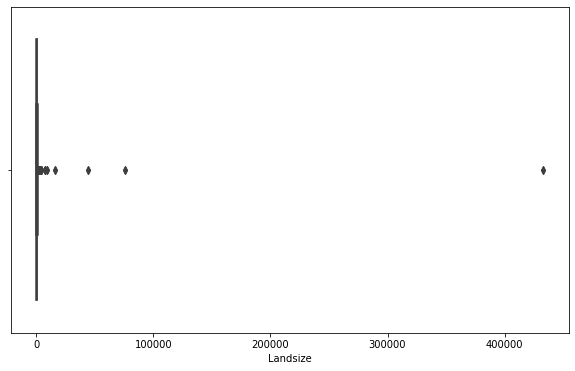

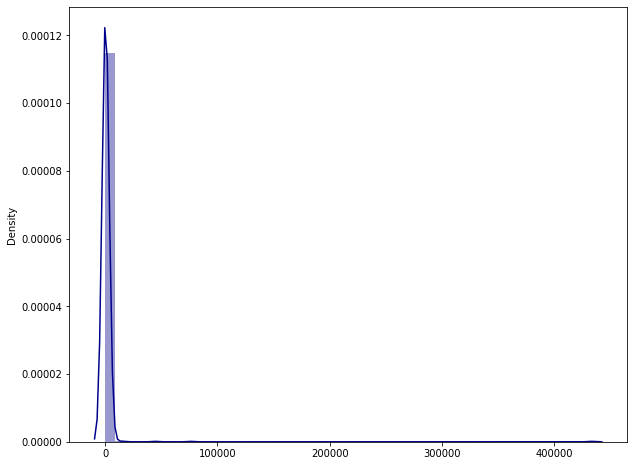

In [ ]:
print('Skew Landsize: ',final_data['Landsize'].skew())
fig, ax= plt.subplots(figsize=(10, 6))
sns.boxplot(x=final_data['Landsize'])
fig, ax= plt.subplots(figsize=(10, 8))
sns.distplot(x=final_data['Landsize'], color='darkblue')

Skew BuildingArea:  28.13834788662399


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


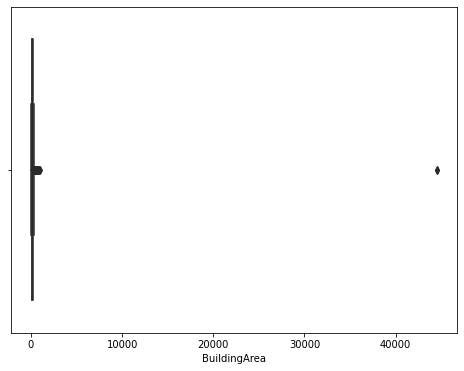

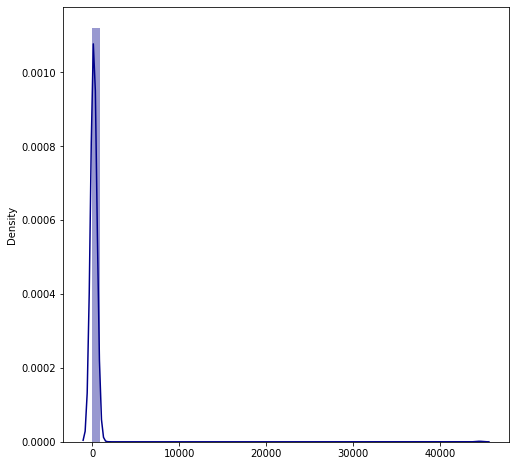

In [ ]:
print('Skew BuildingArea: ',final_data['BuildingArea'].skew())
fig, ax= plt.subplots(1, figsize=(8, 6))
sns.boxplot(x=final_data['BuildingArea'], color='darkred')
fig, ax= plt.subplots(figsize=(8, 8))
sns.distplot(x=final_data['BuildingArea'], color='darkblue')

Skew Car:  1.3907895763315765


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


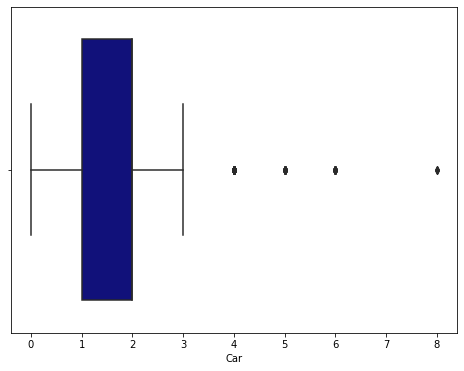

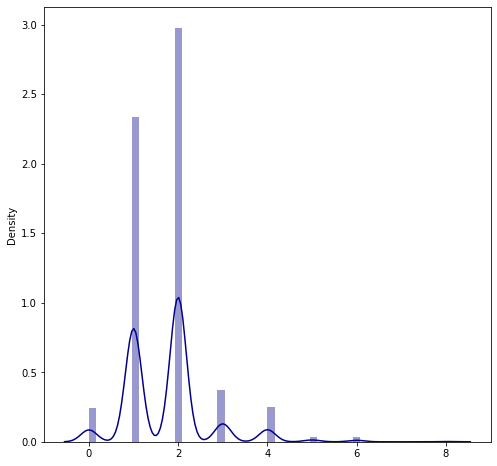

In [ ]:
print('Skew Car: ',final_data['Car'].skew())
fig, ax= plt.subplots(1, figsize=(8, 6))
sns.boxplot(x=final_data['Car'], color='darkblue')
fig, ax= plt.subplots(figsize=(8, 8))
sns.distplot(x=final_data['Car'], color='darkblue')

Skew Bathroom:  0.9421565576441215


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


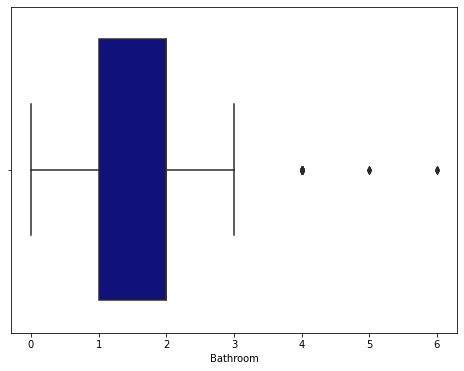

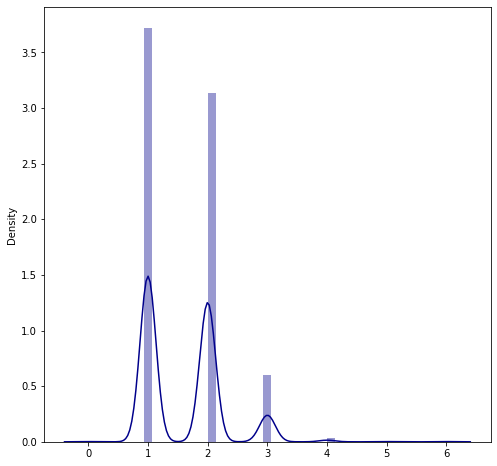

In [ ]:
print('Skew Bathroom: ',final_data['Bathroom'].skew())
fig, ax= plt.subplots(1, figsize=(8, 6))
sns.boxplot(x=final_data['Bathroom'], color='darkblue')
fig, ax= plt.subplots(figsize=(8, 8))
sns.distplot(x=final_data['Bathroom'], color='darkblue')

Skew Bedroom2:  0.3491670936425256


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


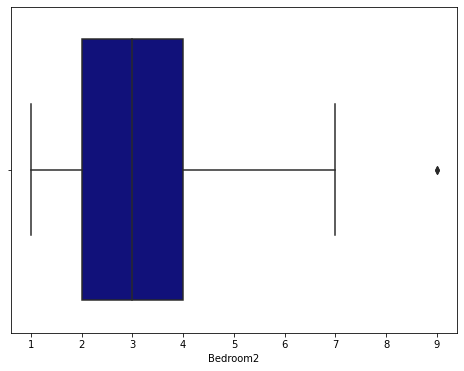

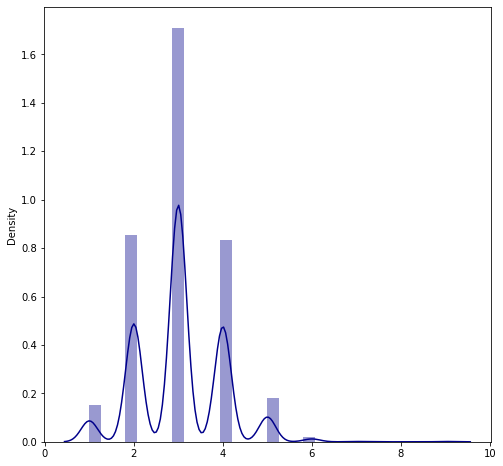

In [ ]:
print('Skew Bedroom2: ',final_data['Bedroom2'].skew())
fig, ax= plt.subplots(1, figsize=(8, 6))
sns.boxplot(x=final_data['Bedroom2'], color='darkblue')
fig, ax= plt.subplots(figsize=(8, 8))
sns.distplot(x=final_data['Bedroom2'], color='darkblue')

In [ ]:
final_data_droped.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Regionname,Propertycount
0,Abbotsford,217 Langridge St,3,h,S,Jellis,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
1,Abbotsford,18a Mollison St,2,t,S,Jellis,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
2,Abbotsford,403/609 Victoria St,2,u,S,Dingle,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
3,Abbotsford,25/84 Trenerry Cr,2,u,SP,Biggin,10/12/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
4,Abbotsford,106/119 Turner St,1,u,SP,Purplebricks,10/12/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0


In [ ]:
final_data_droped.isnull().sum()*100 / len(final_data_droped)

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.014841
Postcode          0.014841
Bedroom2         51.484120
Bathroom         51.513802
Car              52.597210
Landsize         71.133868
BuildingArea     76.254081
Regionname        0.014841
Propertycount     0.014841
dtype: float64

In [ ]:
final_data_droped['Landsize'].fillna(value=final_data_droped['Landsize'].median(), inplace=True)
final_data_droped['BuildingArea'].fillna(value=final_data_droped['BuildingArea'].median(), inplace=True)
final_data_droped['Car'].fillna(value=final_data_droped['Car'].median(), inplace=True)
final_data_droped['Bathroom'].fillna(value=final_data_droped['Bathroom'].median(), inplace=True)
final_data_droped['Bedroom2'].fillna(value=final_data_droped['Bedroom2'].median(), inplace=True)


In [ ]:
final_data_droped.isnull().sum()*100 / len(final_data_droped)

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.014841
Postcode         0.014841
Bedroom2         0.000000
Bathroom         0.000000
Car              0.000000
Landsize         0.000000
BuildingArea     0.000000
Regionname       0.014841
Propertycount    0.014841
dtype: float64

In [ ]:
final_data_droped.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
Final_pred = pd.DataFrame(Final_model.predict(final_data_droped), columns=['Pridicted_Price'])
Final_pred

,Pridicted_Price
0,1487325.625
1,1021853.375
2,941908.250
3,906057.750
4,835165.500
...,...
6733,1410863.625
6734,1219818.875
6735,1246383.625
6736,1127569.375




> Placing in final_data_droped to make a presentable dataframe



In [ ]:
Presentation_Data = pd.concat([final_data_droped, Final_pred], axis=1)
Presentation_Data.describe()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Pridicted_Price
count,6738.000000,6737.000000,6737.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6737.000000,6.738000e+03
mean,2.982042,11.521330,3115.326852,3.015435,1.804245,1.872217,725.818937,146.660563,7646.996438,1.076540e+06
std,0.950990,6.693933,111.646734,0.654326,0.508908,0.646404,7611.134381,765.678729,4689.033353,4.958908e+05
min,1.000000,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,389.000000,2.181146e+05
25%,2.000000,6.800000,3046.000000,3.000000,2.000000,2.000000,556.000000,130.000000,4181.000000,7.036528e+05
50%,3.000000,10.900000,3101.000000,3.000000,2.000000,2.000000,556.000000,130.000000,6567.000000,9.728914e+05
75%,4.000000,14.200000,3156.000000,3.000000,2.000000,2.000000,556.000000,130.000000,10412.000000,1.315300e+06
max,12.000000,48.100000,3978.000000,9.000000,6.000000,8.000000,433014.000000,44515.000000,21650.000000,5.594908e+06


In [ ]:
Presentation_Data.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Regionname,Propertycount,Pridicted_Price
0,Abbotsford,217 Langridge St,3,h,S,Jellis,8/10/2016,2.5,3067.0,3.0,2.0,2.0,556.0,130.0,Northern Metropolitan,4019.0,1487325.625
1,Abbotsford,18a Mollison St,2,t,S,Jellis,8/10/2016,2.5,3067.0,3.0,2.0,2.0,556.0,130.0,Northern Metropolitan,4019.0,1021853.375
2,Abbotsford,403/609 Victoria St,2,u,S,Dingle,8/10/2016,2.5,3067.0,3.0,2.0,2.0,556.0,130.0,Northern Metropolitan,4019.0,941908.250
3,Abbotsford,25/84 Trenerry Cr,2,u,SP,Biggin,10/12/2016,2.5,3067.0,3.0,2.0,2.0,556.0,130.0,Northern Metropolitan,4019.0,906057.750
4,Abbotsford,106/119 Turner St,1,u,SP,Purplebricks,10/12/2016,2.5,3067.0,3.0,2.0,2.0,556.0,130.0,Northern Metropolitan,4019.0,835165.500


In [ ]:
Presentation_Data.tail()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Regionname,Propertycount,Pridicted_Price
6733,Templestowe,10 Hathaway Cl,4,h,S,Barry,26/08/2017,15.5,3106.0,4.0,2.0,2.0,689.0,130.0,Eastern Metropolitan,6202.0,1410863.625
6734,Thornbury,201 Gooch St,3,h,S,Nelson,26/08/2017,7.0,3071.0,3.0,1.0,2.0,470.0,151.0,Northern Metropolitan,8870.0,1219818.875
6735,Viewbank,149 Graham Rd,5,h,SP,Nelson,26/08/2017,8.9,3084.0,5.0,3.0,3.0,696.0,130.0,Eastern Metropolitan,2698.0,1246383.625
6736,Wantirna,16 chesterfield Ct,4,h,S,Ray,26/08/2017,14.7,3152.0,4.0,2.0,2.0,704.0,200.0,Eastern Metropolitan,5424.0,1127569.375
6737,Williamstown,83 Power St,3,h,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,130.0,Western Metropolitan,6380.0,1330092.125


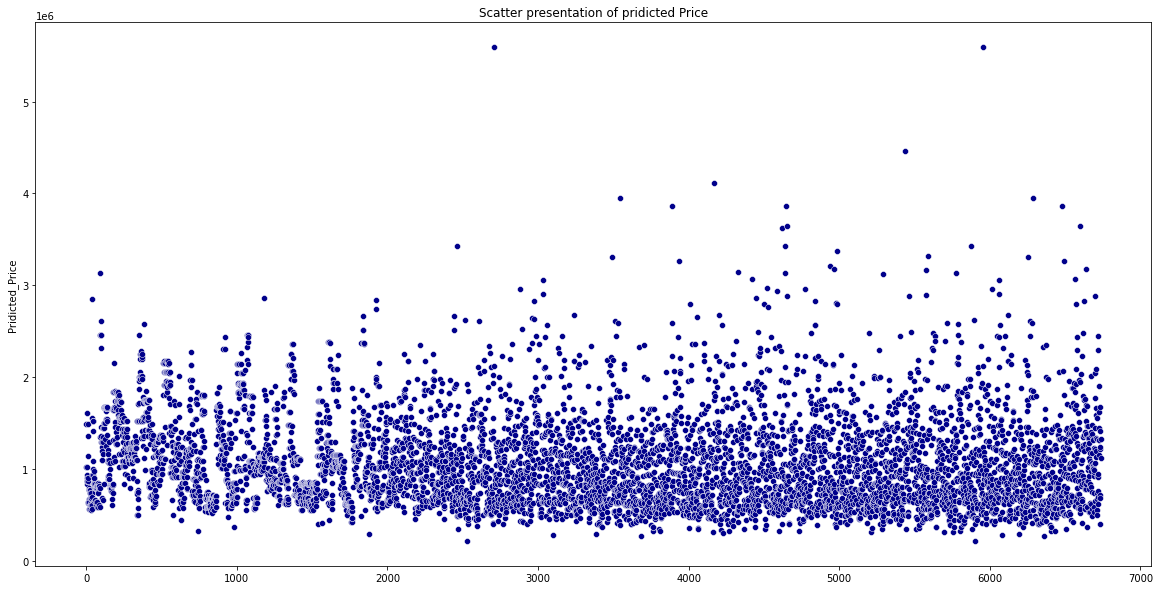

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Scatter presentation of pridicted Price')
sns.scatterplot(x=Final_pred.index, y=Final_pred['Pridicted_Price'], color='darkblue')


# **Conclusion**


* Final file for pridictions were provided for price pridictions.  
* File with combined group pridicted prices are exported as csv.  



In [ ]:
Presentation_Data.to_csv('Final_Presentation_Data.csv')
files.download('Final_Presentation_Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
